In [1]:
import pandas as pd #For reading data from files into table
import numpy as np #For computing maths on data columns
from matplotlib import pyplot as plt #For plotting basic graphs. Also provides indepth framework for seaborn
import seaborn as sns #For plotting visually asthetic graphs. Works in tandem with matplotlib's pyplot

# Gather 

For this project we would be considering the Kaggle dataset on beers and breweries they originate from.  
<TBD>

In [2]:
#Loading beers.csv
df_beer = pd.read_csv('beers.csv')

#Loading breweries.csv
df_breweries = pd.read_csv('breweries.csv')

# Assess 

In [3]:
df_beer.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [4]:
df_breweries.head()

,Unnamed: 0,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA


In [5]:
df_beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2410 non-null   int64  
 1   abv         2348 non-null   float64
 2   ibu         1405 non-null   float64
 3   id          2410 non-null   int64  
 4   name        2410 non-null   object 
 5   style       2405 non-null   object 
 6   brewery_id  2410 non-null   int64  
 7   ounces      2410 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 150.8+ KB


In [6]:
df_breweries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  558 non-null    int64 
 1   name        558 non-null    object
 2   city        558 non-null    object
 3   state       558 non-null    object
dtypes: int64(1), object(3)
memory usage: 17.6+ KB


In [7]:
#Keeping only columns that are required for df_beers
variables_beer = ['abv', 'ibu', 'id', 'name', 'style', 'brewery_id', 'ounces']
df_beer = df_beer[variables_beer]

#Keeping only columns that are required for df_breweries
variables_breweries = ['name', 'city', 'state']
df_breweries = df_breweries[variables_breweries]

In [8]:
df_beer.describe()

,abv,ibu,id,brewery_id,ounces
count,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,0.059773,42.713167,1431.113278,231.749793,13.592241
std,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.001000,4.000000,1.000000,0.000000,8.400000
25%,0.050000,21.000000,808.250000,93.000000,12.000000
50%,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,0.067000,64.000000,2075.750000,366.000000,16.000000
max,0.128000,138.000000,2692.000000,557.000000,32.000000


#### Data Quality:

- ibu is present for 1405 rows
- abv is missing for 62 rows
- serving size should be an ordered categorical variable

#### Data Tidiness

N/A

# Cleaning 

Creating copies of both the dataframes first

In [43]:
df_beer_copy = df_beer.copy()
df_breweries_copy = df_breweries.copy()

### Missing Values of IBU and ABV

##### Define  
Remove all rows without ibu or abv

##### Code

In [54]:
# Removing all rows without ibu and 
df_beer_copy = df_beer_copy[~((df_beer_copy['ibu'].isna()) | (df_beer_copy['abv'].isna()))]

In [55]:
df_beer_copy.reset_index(inplace=True, drop=True)

##### Check

In [56]:
df_beer_copy[df_beer_copy['ibu'].isna()]

,abv,ibu,id,name,style,brewery_id,ounces


In [57]:
df_beer_copy[df_beer_copy['abv'].isna()]

,abv,ibu,id,name,style,brewery_id,ounces


### Ounces has set values but is of type string

##### Define 

Convert Ounces to ordered categorical variable

##### Code

In [120]:
df_beer_copy['ounces'].unique()

c:\users\guptaa\appdata\local\programs\python\python39\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


[12.0, 8.4, 16.0, 24.0, 19.2, 32.0, 16.9]
Categories (7, float64): [8.4 < 12.0 < 16.0 < 16.9 < 19.2 < 24.0 < 32.0]

In [121]:
ounces = [8.4, 12., 16., 16.9, 19.2, 24., 32.]
ordered_ounces = pd.api.types.CategoricalDtype(ordered=True, categories=ounces)
df_beer_copy['ounces'] = df_beer_copy['ounces'].astype(ordered_ounces)

##### Checking

In [122]:
df_beer_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405 entries, 0 to 1404
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   abv         1405 non-null   float64 
 1   ibu         1405 non-null   float64 
 2   id          1405 non-null   int64   
 3   name        1405 non-null   object  
 4   style       1403 non-null   object  
 5   brewery_id  1405 non-null   int64   
 6   ounces      1405 non-null   category
dtypes: category(1), float64(2), int64(2), object(2)
memory usage: 67.7+ KB


### Merging Beers with Breweries

In [123]:
df_copy = df_beer_copy.merge(df_breweries_copy, how='left', left_on='brewery_id', right_on=df_breweries_copy.index)

In [124]:
cols = ['ABV', 'IBU', 'Beer ID', 'Beer Name', 'Beer Style', 'Brewery ID', 'Serving Size (in Oz.)', 'Brewery Name', 'Brewery City', 'Brewery State']
df_copy.columns = cols

# Analyze 

#### Univariate Analysis 

##### Style of Beer

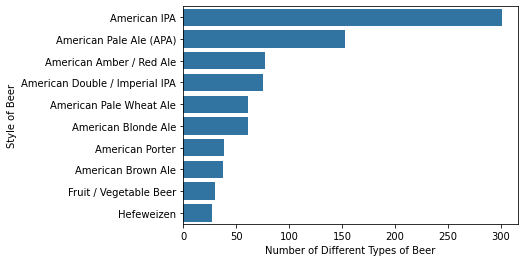

In [125]:
#Considering the top 10 beer styles by count
top_10_beer = df_copy['Beer Style'].value_counts()[0:10].index
df_beer_sub = df_copy[df_copy['Beer Style'].isin(top_10_beer)]

#Plotting the top 10 beer styles in a histogram
color = sns.color_palette()[0]
sns.countplot(data= df_beer_sub, y='Beer Style', order = top_10_beer, color=color)
plt.ylabel('Style of Beer')
plt.xlabel('Number of Different Types of Beer');

Seems like American IPA is the most favored beer style in the United States. On a distant second, Americans prefer the American Pale Ale followed by American Amber / Red Ale.

##### Types of Breweries

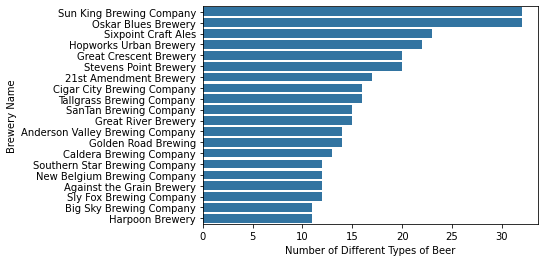

In [126]:
#Considering the top 20 Breweries by count
top_20_breweries = df_copy['Brewery Name'].value_counts()[0:20].index
df_brewery_sub = df_copy[df_copy['Brewery Name'].isin(top_20_breweries)]

#Plotting the top 10 Breweries in a histogram
color = sns.color_palette()[0]
sns.countplot(data= df_brewery_sub, y='Brewery Name', order = top_20_breweries, color=color)
plt.ylabel('Brewery Name')
plt.xlabel('Number of Different Types of Beer');

##### Top States for Breweries

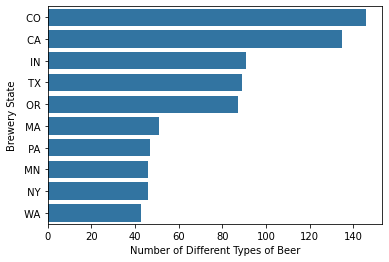

In [130]:
#Considering the top 10 States of Breweries by count
top_10_state = df_copy['Brewery State'].value_counts()[0:10].index #Soring the index as an ordered series for ranking
df_state_sub = df_copy[df_copy['Brewery State'].isin(top_10_state)] #Keeping only the rows with the Brewery State in the top 10 states

#Plotting the top 10 States of Breweries in a histogram
color = sns.color_palette()[0]
#Generate a countplot ordered on the basis of the top_10_state series
sns.countplot(data= df_state_sub, y='Brewery State', order = top_10_state, color=color)
plt.ylabel('Brewery State')
plt.xlabel('Number of Different Types of Beer');

##### Serving Sizes

c:\users\guptaa\appdata\local\programs\python\python39\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


Text(0.5, 0, 'Number of Beers')

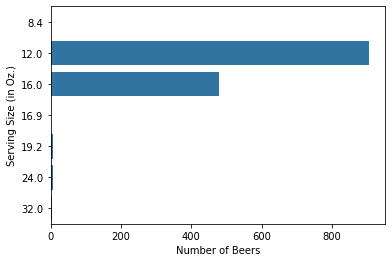

In [128]:

sns.countplot(data = df_copy, y='Serving Size (in Oz.)', color=color)
plt.xlabel("Number of Beers")

##### ABV Distribution 

Text(0.5, 0, 'Number of Beers')

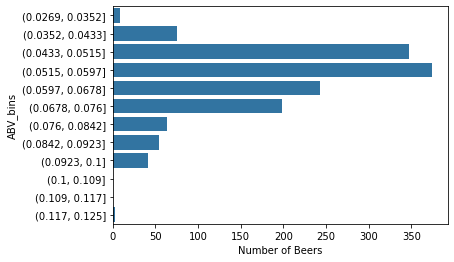

In [129]:
df_copy['ABV_bins'] = pd.cut(df_copy['ABV'], 12)
sns.countplot(data=df_copy, y='ABV_bins', color=color)
plt.xlabel('Number of Beers')

##### IBU Distribution

Text(0.5, 0, 'Number of Beers')

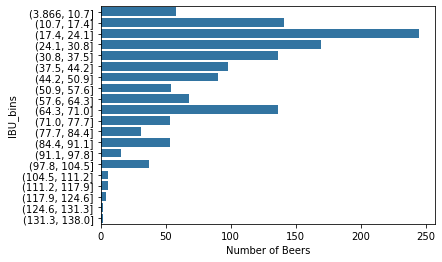

In [65]:
df_copy['IBU_bins'] = pd.cut(df_copy['IBU'], 20)
sns.countplot(data=df_copy, y='IBU_bins', color=color)
plt.xlabel('Number of Beers')

#### Bivariate Analysis 

##### Relationship between ABV and IBU

<AxesSubplot:xlabel='ABV', ylabel='IBU'>

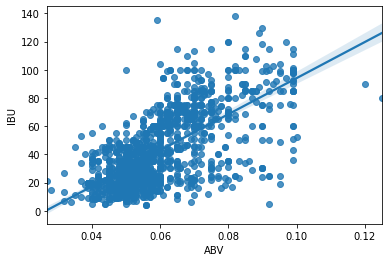

In [66]:
sns.regplot(data=df_copy, x='ABV', y='IBU')

###### On a log scale

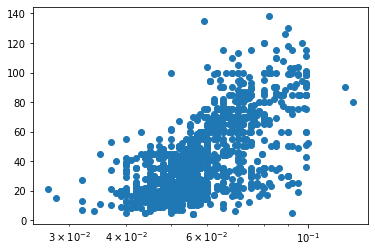

In [67]:
plt.scatter(data=df_copy, x='ABV', y='IBU')
plt.xscale('log')

##### Spread of IBU for top 10 beers 

<AxesSubplot:xlabel='IBU', ylabel='Beer Style'>

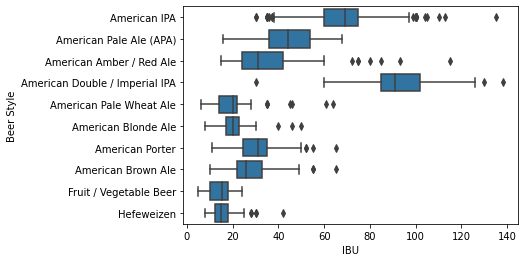

In [68]:
sns.boxplot(data=df_beer_sub, y='Beer Style', x='IBU', order=top_10_beer, color=color)

##### Spread of ABV for top 10 beers

<AxesSubplot:xlabel='ABV', ylabel='Beer Style'>

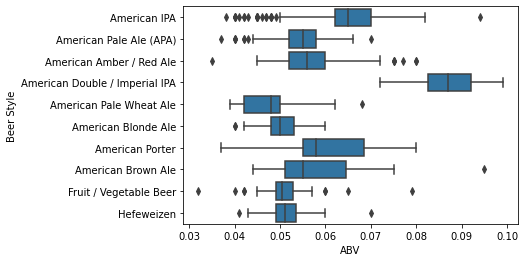

In [69]:
sns.boxplot(data=df_beer_sub, y='Beer Style', x='ABV', order=top_10_beer, color=color)

##### Serving size for top 10 beers

<AxesSubplot:xlabel='Serving Size (in Oz.)', ylabel='Beer Style'>

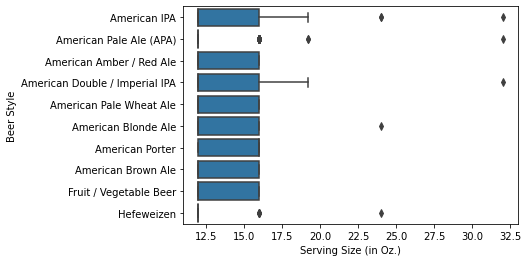

In [70]:
sns.boxplot(data=df_beer_sub, y='Beer Style', x='Serving Size (in Oz.)', order=top_10_beer, color=color)

#### Multivariate Analysis 

c:\users\guptaa\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


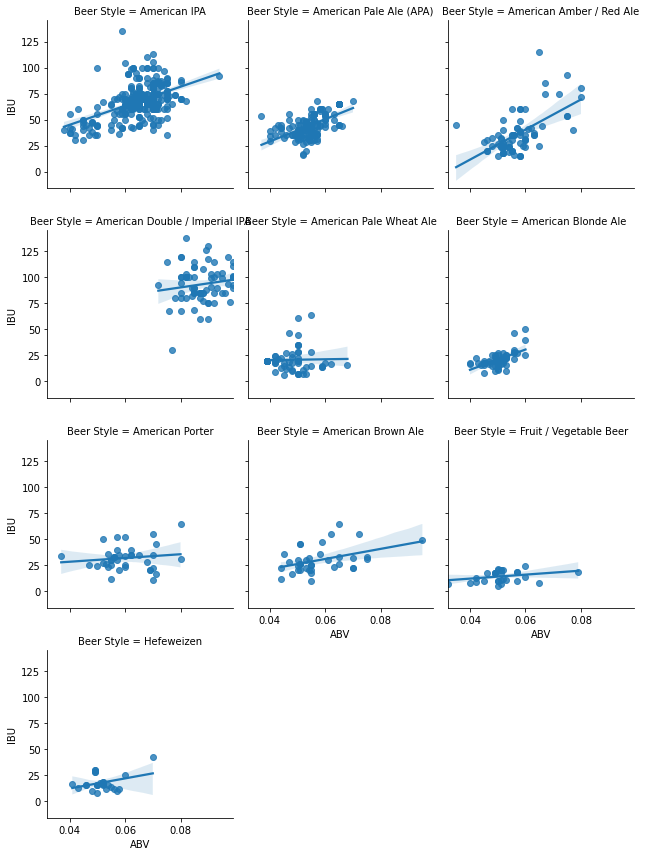

In [71]:
g = sns.FacetGrid(data=df_beer_sub, col='Beer Style', col_wrap=3,size=3, col_order=top_10_beer)
g.map(sns.regplot, "ABV", "IBU")

c:\users\guptaa\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\guptaa\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\users\guptaa\appdata\local\programs\python\python39\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
c:\users\guptaa\appdata\local\programs\python\python39\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
c:\user

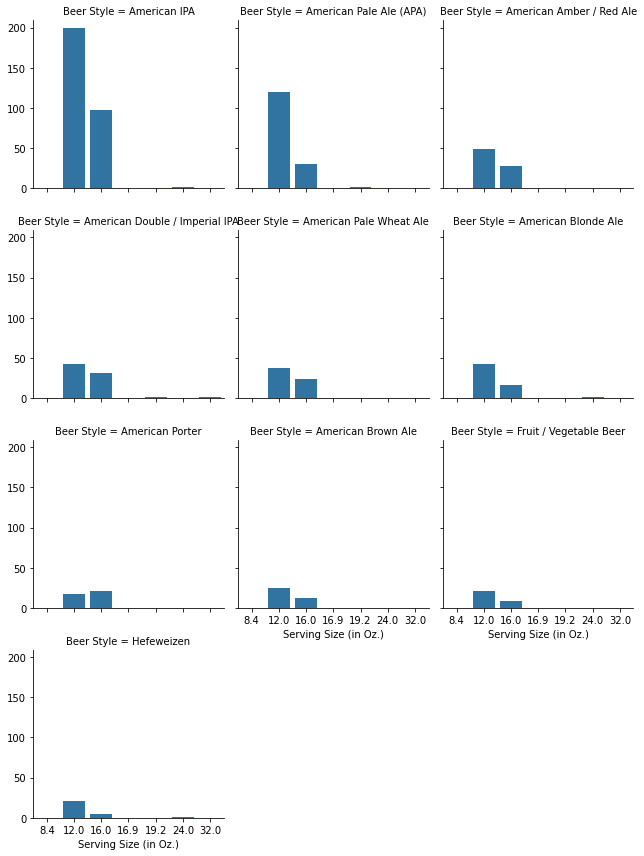

In [140]:
g = sns.FacetGrid(data=df_beer_sub, col='Beer Style', col_wrap=3,size=3, col_order=top_10_beer)
g.map(sns.countplot, "Serving Size (in Oz.)")

c:\users\guptaa\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


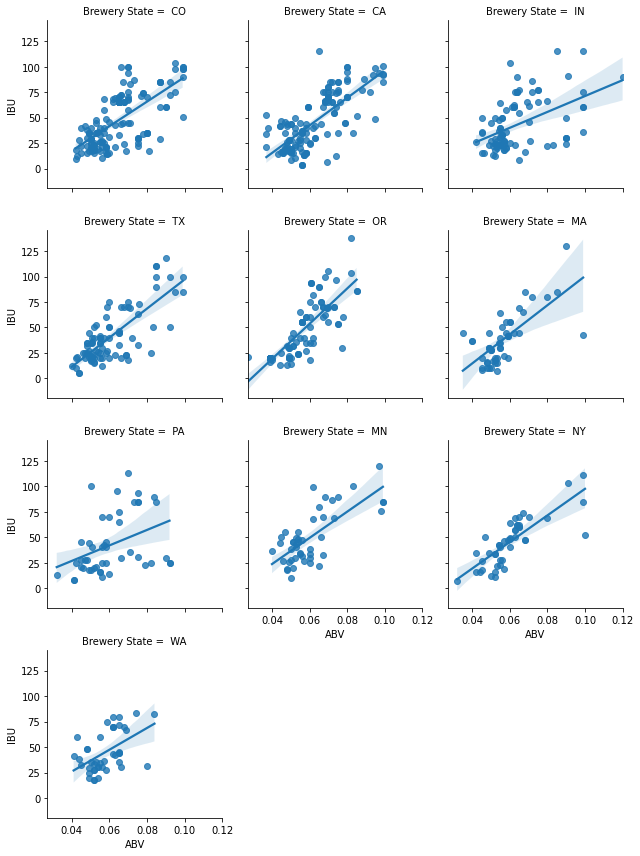

In [139]:
g = sns.FacetGrid(data=df_state_sub, col='Brewery State', col_wrap=3,size=3, col_order=top_10_state)
g.map(sns.regplot, "ABV", "IBU");

c:\users\guptaa\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\guptaa\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


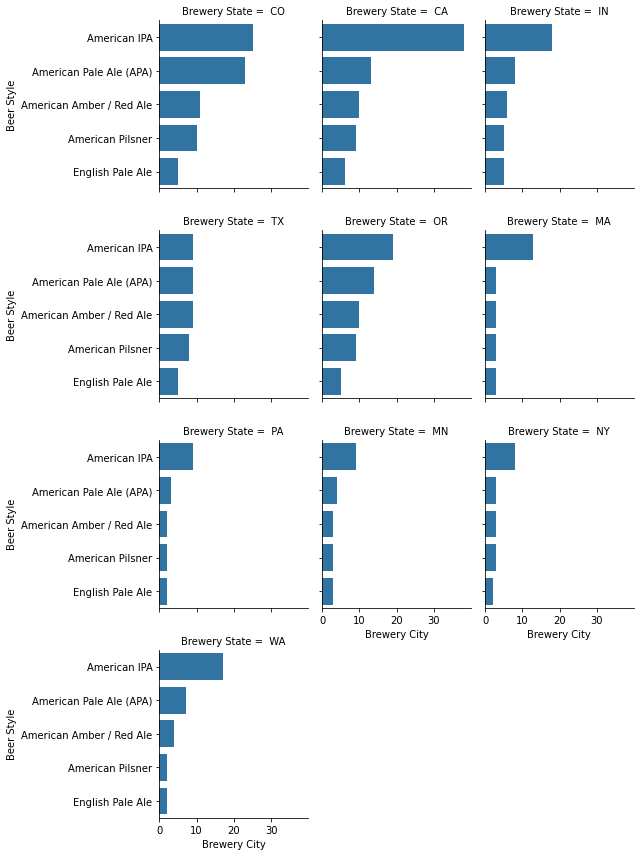

In [137]:
# Top beers in each state
# First we group by the Brewery State and the Beer Style
df_gb = df_state_sub.groupby(['Brewery State','Beer Style'])['Brewery City'].count().reset_index()
# We would like to get the top 5 beer styles in each of these states 
df_gb = df_gb.groupby('Brewery State').apply(lambda grp: grp.nlargest(5, 'Brewery City'))
#Removing the Multi Indexing
df_gb.reset_index(drop=True, inplace=True)

# FacetGrid plot for showing each State as a different plot
g = sns.FacetGrid(data=df_gb, col='Brewery State', col_wrap=3,size=3, col_order=top_10_state)
# Mapping a barplot to the FacetGrid object created above
g.map(sns.barplot, "Brewery City", "Beer Style")

c:\users\guptaa\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\guptaa\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\users\guptaa\appdata\local\programs\python\python39\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
c:\users\guptaa\appdata\local\programs\python\python39\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
c:\user

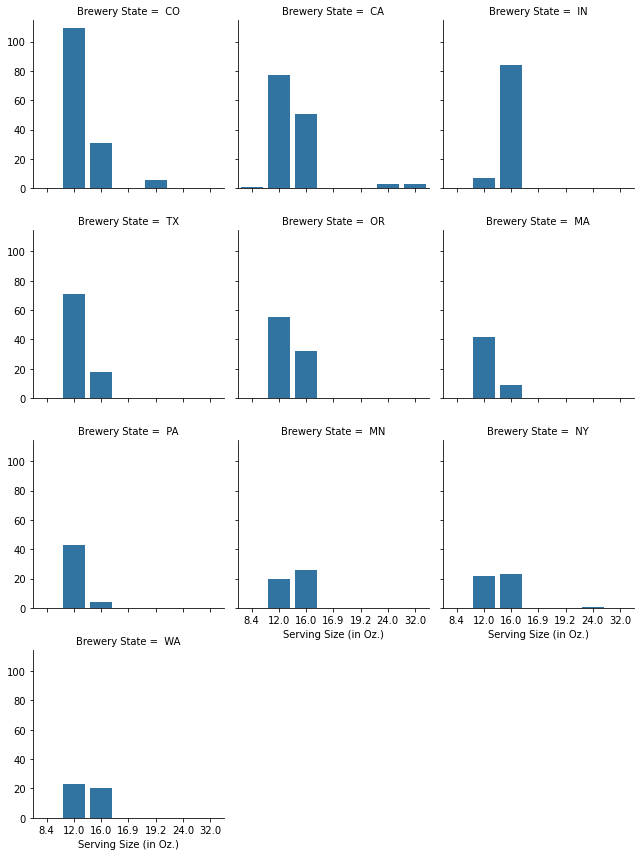

In [138]:
g = sns.FacetGrid(data=df_state_sub, col='Brewery State', col_wrap=3,size=3, col_order=top_10_state)
g.map(sns.countplot, "Serving Size (in Oz.)")